# 0. Install and Import Dependencies

In [1]:
!pip list

Package                                  Version               Editable project location
---------------------------------------- --------------------- -------------------------
absl-py                                  1.4.0
accelerate                               0.22.0
access                                   1.1.9
affine                                   2.4.0
aiobotocore                              2.5.4
aiofiles                                 22.1.0
aiohttp                                  3.8.4
aiohttp-cors                             0.7.0
aioitertools                             0.11.0
aiorwlock                                1.3.0
aiosignal                                1.3.1
aiosqlite                                0.19.0
albumentations                           1.3.1
alembic                                  1.12.0
altair                                   5.1.1
annotated-types                          0.5.0
annoy                                    1.17.3
ansiwrap         

In [2]:
%pip install opencv-python matplotlib imageio gdown tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import imageio

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

# 1. Build Data Loading Functions

In [7]:
import gdown

In [8]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=726b159c-fd8e-4e68-9532-6707a56660df
To: /kaggle/working/data.zip
100%|██████████| 423M/423M [00:16<00:00, 26.0MB/s] 


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [9]:
def load_video(path:str) -> List[float]: 

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [10]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [11]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [12]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [13]:
char_to_num(['n','i','c','k'])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([14,  9,  3, 11])>

In [14]:
num_to_char([14,  9,  3, 11])

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'n', b'i', b'c', b'k'], dtype=object)>

In [15]:
def load_alignments(path:str) -> List[str]: 
    with open(path, 'r') as f: 
        lines = f.readlines() 
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil': 
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [16]:
def load_data(path: str): 
#     path = bytes.decode(path.numpy())
#     print(path)
    file_name = path.numpy().decode('utf-8').split('/')[-1].split('.')[0]
    # File name splitting for windows
#     file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path) 
    alignments = load_alignments(alignment_path)
    
    return frames, alignments
#     return file_name

In [17]:
test_path = './data/s1/bbal6n.mpg'

In [18]:
# test_path = bytes.decode(test_path.numpy())

In [19]:
# hi = tf.convert_to_tensor(test_path).numpy().decode('utf-8')
# hi

In [20]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]

'bbal6n'

In [21]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

In [22]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

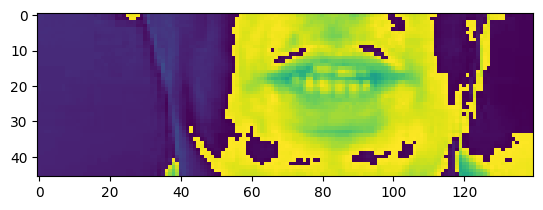

In [23]:
plt.imshow(frames[40])

In [24]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

In [25]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [26]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

# 2. Create Data Pipeline

In [27]:
from matplotlib import pyplot as plt

In [28]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split 
train = data.take(450)
test = data.skip(450)

In [29]:
len(train)

450

In [30]:
frames, alignments = data.as_numpy_iterator().next()

In [31]:
len(frames)

2

In [32]:
sample = data.as_numpy_iterator()

In [33]:
# len(sample)

In [34]:
val = sample.next(); val[0]

array([[[[[1.2794168 ],
          [1.2794168 ],
          [1.2794168 ],
          ...,
          [9.266079  ],
          [9.304849  ],
          [8.917147  ]],

         [[1.2794168 ],
          [1.2794168 ],
          [1.2794168 ],
          ...,
          [8.645756  ],
          [8.917147  ],
          [8.917147  ]],

         [[1.2018763 ],
          [1.2018763 ],
          [1.2018763 ],
          ...,
          [9.653781  ],
          [9.770091  ],
          [9.770091  ]],

         ...,

         [[0.8529445 ],
          [0.8529445 ],
          [0.8529445 ],
          ...,
          [9.692551  ],
          [9.653781  ],
          [9.653781  ]],

         [[0.8529445 ],
          [0.8529445 ],
          [0.8529445 ],
          ...,
          [9.61501   ],
          [9.61501   ],
          [9.61501   ]],

         [[0.8529445 ],
          [0.8529445 ],
          [0.8529445 ],
          ...,
          [9.61501   ],
          [9.61501   ],
          [9.61501   ]]],


        [[[1.2018

In [35]:

# for i in range (50):
#     val = sample.next()
    
#     print(i,val[0][0][0][0][0])
#     print(tf.strings.reduce_join([num_to_char(word) for word in val[1][0]]))
#     yhat = model.predict(val[0])
#     print(tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)]))
#     print(tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]]))

In [36]:
# imageio.mimsave('./animation.gif', val[0][0], fps=10)

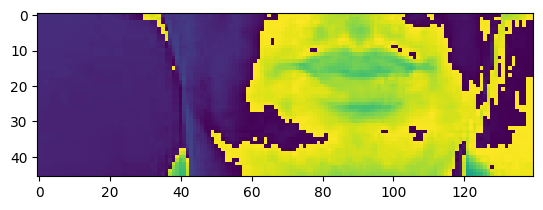

In [37]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video 
plt.imshow(val[0][0][35])

In [38]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin green with b six please'>

# 3. Design the Deep Neural Network

In [39]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [40]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [41]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [42]:
# url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
# url = 'https://drive.google.com/file/d/1fyZoYgqZw_aRa66kiOR6J8XLu3Y9wfMg/view?usp=sharing'
# url = 'https://drive.google.com/u/0/uc?id=1JAmcd2v0JcZStgs69VytgqwGJMlhNeaT&export=download'
# output = 'check.zip'
# gdown.download(url, output, quiet=False)
# gdown.extractall('check.zip', 'models')

In [43]:
# model.load_weights('./models/models/checkpoint')

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128)  3584      
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128)  0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 75, 23, 70, 128)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 75, 11, 35, 256)  0         
 3D)                                                    

In [45]:
5*17*75

6375

In [46]:
yhat = model.predict(val[0])

1/1 [==============================] - 5s 5s/step


In [47]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'yyyyyyy888888888888888888888888888888888888888eeeeeeee888888888888888888888'>

In [48]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'yyyyyyy888888888888888888888888888888888888888eeeeeeee888888888888888888888'>

In [49]:
model.input_shape

(None, 75, 46, 140, 1)

In [50]:
model.output_shape

(None, 75, 41)

# 4. Setup Training Options and Train

In [51]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [52]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [53]:
class ProduceExample(tf.keras.callbacks.Callback): 
    def __init__(self, dataset) -> None: 
        self.dataset = dataset.as_numpy_iterator()
    
    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):           
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [54]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.00001), loss=CTCLoss)

In [55]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True) 

In [56]:
schedule_callback = LearningRateScheduler(scheduler)

In [57]:
example_callback = ProduceExample(test)

In [58]:
# model.fit(train, validation_data=test, epochs=46, callbacks=[checkpoint_callback, schedule_callback, example_callback])

# 5. Make a Prediction 

In [59]:
# url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
# output = 'checkpoints.zip'
# gdown.download(url, output, quiet=False)
# gdown.extractall('checkpoints.zip', 'models')

In [60]:
# model.load_weights('./models/checkpoint')

In [61]:
test_data = data.as_numpy_iterator()

In [62]:
sample = test_data.next()

In [63]:
sample[0].shape

(2, 75, 46, 140, 1)

In [64]:
sample[1].shape

(2, 40)

In [65]:
sample[1]

array([[12,  1, 25, 39, 18,  5,  4, 39,  2, 25, 39, 12, 39, 15, 14,  5,
        39, 19, 15, 15, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [16, 12,  1,  3,  5, 39, 23,  8,  9, 20,  5, 39, 23,  9, 20,  8,
        39,  5, 39, 15, 14,  5, 39, 19, 15, 15, 14,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]])

In [66]:
yhat = model.predict(sample[0])

1/1 [==============================] - 2s 2s/step


In [67]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'lay red by l one soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'place white with e one soon'>]

In [68]:
# for i in range (50):
#     val = sample.next()
    
# #     print(i,val[0][0][0][0][0])
#     og = tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])
#     print(og)
#     yhat = model.predict(val[0])
# #     print(tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)]))
# #     print(tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]]))
#     decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()
#     predicted = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]
#     print(predicted)

In [69]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [70]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'y18'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'1n8'>]

# Test on a Video

In [71]:
sample1 = load_data(tf.convert_to_tensor('./data/s1/bras9a.mpg'))

In [72]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample1[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]

In [73]:
yhat = model.predict(tf.expand_dims(sample1[0], axis=0))

1/1 [==============================] - 1s 504ms/step


In [74]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [75]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'y18'>]

In [76]:
len(test)

50

# Accuracy Analysis

### On 50-Epoch Trained Model

In [77]:
url = 'https://drive.google.com/u/0/uc?id=1JAmcd2v0JcZStgs69VytgqwGJMlhNeaT&export=download'
output = 'check.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('check.zip', 'models')

Downloading...
From (uriginal): https://drive.google.com/u/0/uc?id=1JAmcd2v0JcZStgs69VytgqwGJMlhNeaT&export=download
From (redirected): https://drive.google.com/uc?id=1JAmcd2v0JcZStgs69VytgqwGJMlhNeaT&export=download&confirm=t&uuid=7723e342-c7d6-49f5-a2ce-8865a8d420ca
To: /kaggle/working/check.zip
100%|██████████| 95.3M/95.3M [00:02<00:00, 32.4MB/s]


['models/models/checkpoint',
 'models/models/checkpoint.index',
 'models/models/checkpoint.data-00000-of-00001']

In [78]:
model.load_weights('./models/models/checkpoint')

In [79]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)

In [80]:
test_data = data.as_numpy_iterator()

In [81]:
def levenshtein_distance(str1, str2):
    len_str1 = len(str1) + 1
    len_str2 = len(str2) + 1

    # Initialize a matrix to store edit distances
    matrix = [[0] * len_str2 for _ in range(len_str1)]

    # Initialize the first row and column of the matrix
    for i in range(len_str1):
        matrix[i][0] = i
    for j in range(len_str2):
        matrix[0][j] = j

    # Fill in the matrix using dynamic programming
    for i in range(1, len_str1):
        for j in range(1, len_str2):
            cost = 0 if str1[i - 1] == str2[j - 1] else 1
            matrix[i][j] = min(
                matrix[i - 1][j] + 1,      # Deletion
                matrix[i][j - 1] + 1,      # Insertion
                matrix[i - 1][j - 1] + cost  # Substitution
            )

    return matrix[len_str1 - 1][len_str2 - 1]

def calculate_word_error_rate(reference, hypothesis):
    reference_words = reference.split()
    hypothesis_words = hypothesis.split()

    # Calculate Levenshtein distance between reference and hypothesis words
    distance = levenshtein_distance(reference_words, hypothesis_words)

    # Calculate Word Error Rate
    wer = distance / len(reference_words)
    return wer

def calculate_sentence_error_rate(reference, hypothesis):
    # Calculate Levenshtein distance between reference and hypothesis sentences
    distance = levenshtein_distance(reference, hypothesis)

    # Calculate Sentence Error Rate
    ser = distance / len(reference)
    return ser

In [82]:
word_error_rates_for_model1=[]
sentence_error_rates_for_model1=[]

In [83]:
for i in range (500):
    try:
        sample = test_data.next()

        #     print(i,val[0][0][0][0][0])
        og = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]
        #     og = tf.strings.reduce_join([num_to_char(word) for word in sample[1][0]])

        yhat = model.predict(sample[0])
        #     print(tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)]))
        #     print(tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]]))
        decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()
        predicted = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]


        reference_string = str(og[1])[11:-25]
        hypothesis_string = str(predicted[1])[11:-25]

        wer = calculate_word_error_rate(reference_string, hypothesis_string)
        ser = calculate_sentence_error_rate(reference_string, hypothesis_string)

        word_error_rates_for_model1.append(wer)
        sentence_error_rates_for_model1.append(ser)

        if i<10: # print results for first 10 sentences

            print(og[1])
            print("Real Sentence",str(og[1])[11:-25])

            print(predicted[1])
            print("Sentence Predicted",str(predicted[1])[11:-25])

            print(f"Word Error Rate: {wer * 100:.2f}%")
            print(f"Sentence Error Rate: {ser * 100:.2f}%")

            print()
    except:
        pass
    

1/1 [==============================] - 0s 119ms/step
tf.Tensor(b'set green at i nine again', shape=(), dtype=string)
Real Sentence 'set green at i nine again'
tf.Tensor(b'set green at nine again', shape=(), dtype=string)
Sentence Predicted 'set green at nine again'
Word Error Rate: 16.67%
Sentence Error Rate: 7.41%

1/1 [==============================] - 0s 118ms/step
tf.Tensor(b'set blue with h seven soon', shape=(), dtype=string)
Real Sentence 'set blue with h seven soon'
tf.Tensor(b'set blue with seven soon', shape=(), dtype=string)
Sentence Predicted 'set blue with seven soon'
Word Error Rate: 16.67%
Sentence Error Rate: 7.14%

1/1 [==============================] - 0s 116ms/step
tf.Tensor(b'place sp blue at i six please', shape=(), dtype=string)
Real Sentence 'place sp blue at i six please'
tf.Tensor(b'place blue at six please', shape=(), dtype=string)
Sentence Predicted 'place blue at six please'
Word Error Rate: 28.57%
Sentence Error Rate: 16.13%

1/1 [==========================

[mpeg1video @ 0x7e69500610c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7e69500610c0] Warning MVs not available


1/1 [==============================] - 0s 121ms/step


In [97]:
mean_wer=sum(word_error_rates_for_model1)/len(word_error_rates_for_model1)
mean_ser=sum(sentence_error_rates_for_model1)/len(sentence_error_rates_for_model1)

print("For Model 1")
print(f"Mean Word Error Rate: {mean_wer * 100:.2f}%")
print(f"Mean Sentence Error Rate: {mean_ser * 100:.2f}%")

For Model 1
Mean Word Error Rate: 14.40%
Mean Sentence Error Rate: 6.06%


In [100]:
# print("Max For Model 1")
# print(f"Mean Word Error Rate: {max(word_error_rates_for_model1) * 100:.2f}%")
# print(f"Mean Sentence Error Rate: {max(sentence_error_rates_for_model1) * 100:.2f}%")

In [85]:
len(word_error_rates_for_model1)

498

### On 96-Epoch trained model

In [86]:
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y
From (redirected): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y&confirm=t&uuid=20684f54-1d09-4fa2-bb80-33ebd517253d
To: /kaggle/working/checkpoints.zip
100%|██████████| 94.5M/94.5M [00:02<00:00, 31.9MB/s]


['models/checkpoint.index',
 'models/__MACOSX/._checkpoint.index',
 'models/checkpoint.data-00000-of-00001',
 'models/__MACOSX/._checkpoint.data-00000-of-00001',
 'models/checkpoint',
 'models/__MACOSX/._checkpoint']

In [87]:
model.load_weights('./models/checkpoint')

In [88]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)

In [89]:
test_data = data.as_numpy_iterator()

In [90]:
word_error_rates_for_model2=[]
sentence_error_rates_for_model2=[]

0.34615384615384615

In [91]:
for i in range (500):
    sample = test_data.next()
    
#     print(i,val[0][0][0][0][0])
    og = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]
#     og = tf.strings.reduce_join([num_to_char(word) for word in sample[1][0]])

    yhat = model.predict(sample[0])
#     print(tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)]))
#     print(tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]]))
    decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()
    predicted = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

    
    reference_string = str(og[1])[11:-25]
    hypothesis_string = str(predicted[1])[11:-25]

    wer = calculate_word_error_rate(reference_string, hypothesis_string)
    ser = calculate_sentence_error_rate(reference_string, hypothesis_string)
    
    word_error_rates_for_model2.append(wer)
    sentence_error_rates_for_model2.append(ser)
    
    if i<10: # print results for first 10 sentences
    
        print(og[1])
        print("Real Sentence",str(og[1])[11:-25])

        print(predicted[1])
        print("Sentence Predicted",str(predicted[1])[11:-25])

        print(f"Word Error Rate: {wer * 100:.2f}%")
        print(f"Sentence Error Rate: {ser * 100:.2f}%")

        print()
    

1/1 [==============================] - 0s 124ms/step
tf.Tensor(b'bin red at m five again', shape=(), dtype=string)
Real Sentence 'bin red at m five again'
tf.Tensor(b'bin red at m five again', shape=(), dtype=string)
Sentence Predicted 'bin red at m five again'
Word Error Rate: 0.00%
Sentence Error Rate: 0.00%

1/1 [==============================] - 0s 117ms/step
tf.Tensor(b'place red with d six please', shape=(), dtype=string)
Real Sentence 'place red with d six please'
tf.Tensor(b'place red with d six please', shape=(), dtype=string)
Sentence Predicted 'place red with d six please'
Word Error Rate: 0.00%
Sentence Error Rate: 0.00%

1/1 [==============================] - 0s 115ms/step
tf.Tensor(b'place white by q seven again', shape=(), dtype=string)
Real Sentence 'place white by q seven again'
tf.Tensor(b'place white by q seven again', shape=(), dtype=string)
Sentence Predicted 'place white by q seven again'
Word Error Rate: 0.00%
Sentence Error Rate: 0.00%

1/1 [====================

[mpeg1video @ 0x7e6b340c4600] ac-tex damaged at 22 17
[mpeg1video @ 0x7e6b340c4600] Warning MVs not available


1/1 [==============================] - 0s 113ms/step


In [102]:
len(word_error_rates_for_model2)

500

In [96]:
mean_wer=sum(word_error_rates_for_model2)/len(word_error_rates_for_model2)
mean_ser=sum(sentence_error_rates_for_model2)/len(sentence_error_rates_for_model2)

print("For Model 2")
print(f"Mean Word Error Rate: {mean_wer * 100:.8f}%")
print(f"Mean Sentence Error Rate: {mean_ser * 100:.8f}%")

For Model 2
Mean Word Error Rate: 1.76666667%
Mean Sentence Error Rate: 0.67408067%


In [101]:
# print("Max For Model 2")
# print(f"Mean Word Error Rate: {max(word_error_rates_for_model2) * 100:.8f}%")
# print(f"Mean Sentence Error Rate: {max(sentence_error_rates_for_model2) * 100:.8f}%")